In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_classification_metrics(model, X_train, X_test, y_train, y_test, index_name='classifier'):
    predicted_train = model.predict(X_train)
    predicted_test = model.predict(X_test)
    return pd.DataFrame({
        'accuracy train': [accuracy_score(predicted_train, y_train)],
        'accuracy test': [accuracy_score(predicted_test, y_test)],
        'precision train': [precision_score(predicted_train, y_train)],
        'precision test': [precision_score(predicted_test, y_test)],
        'recall train': [recall_score(predicted_train, y_train)],
        'recall test': [recall_score(predicted_test, y_test)],
        'F1 train': [f1_score(predicted_train, y_train)],
        'F1 train': [f1_score(predicted_test, y_test)],
    }, index=[index_name])

In [226]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, ax=None):
    x_grid, y_grid = np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.03),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.03)
    )
    preds = clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)
    plt.contourf(x_grid, y_grid, preds, cmap='Pastel1')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1')

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Set1', marker='^', edgecolor = 'black')
    plt.show()

# Klasyfikacja

## Regresja logistyczna

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

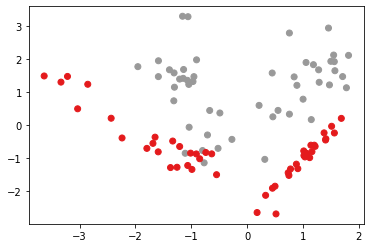

In [87]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Set1')

In [93]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
confusion_matrix(lr.predict(X_test), y_test)

array([[10,  3],
       [ 2, 10]])

In [205]:
plot_class_regions_for_classifier(lr, X_train, y_train, X_test, y_test)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [206]:
calculate_classification_metrics(lr, X_train, X_test, y_train, y_test)

,accuracy train,accuracy test,precision train,precision test,recall train,recall test,F1 train
calssifier,0.671821,0.634021,0.924324,0.956897,0.677228,0.627119,0.757679


### Wielomianowa regresja logistyczna

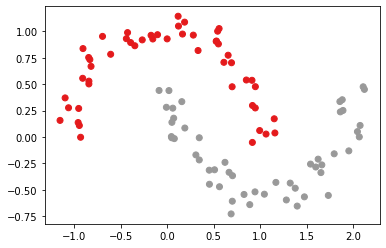

In [213]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X,y)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Set1')

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

plr = Pipeline([
    ('preprocess', PolynomialFeatures(degree=10)),
    ('lr', LogisticRegression()),
])
plr.fit(X_train, y_train)
plot_class_regions_for_classifier(plr, X_train, y_train, X_test, y_test)

UnboundLocalError: local variable 'plt' referenced before assignment

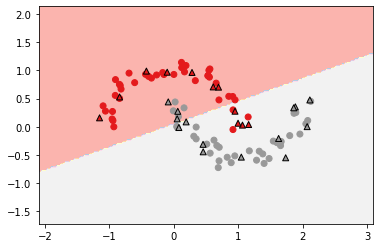

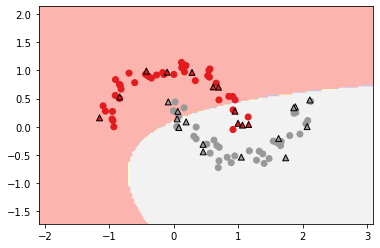

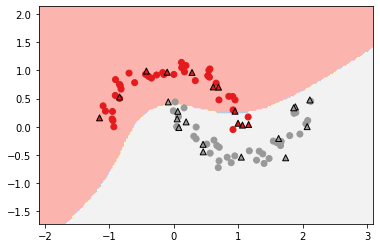

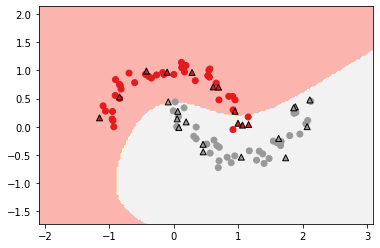

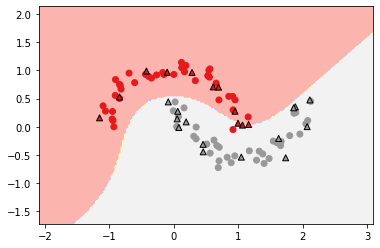

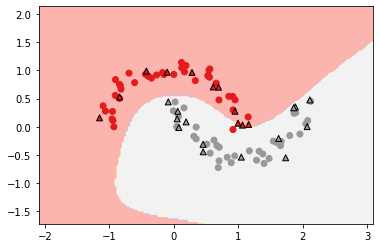

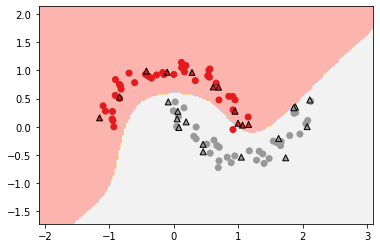

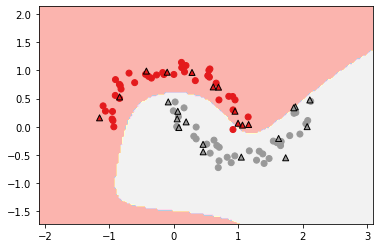

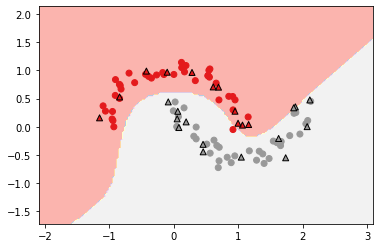

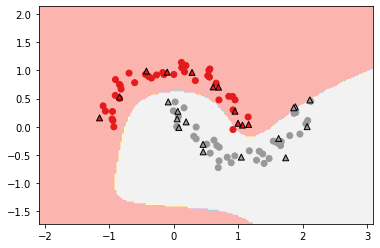

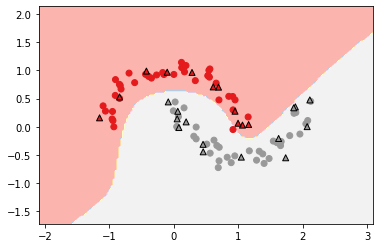

In [227]:

for i in range(1,12):
    plr = Pipeline([
    ('preprocess', PolynomialFeatures(degree=i)),
    ('lr', LogisticRegression()),
    ])
    plr.fit(X_train, y_train)
    plot_class_regions_for_classifier(plr, X_train, y_train, X_test, y_test, ax)

### Regresja logistyczna na realnych danych

In [47]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [48]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [49]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [50]:
data_frame = pd.DataFrame(
    np.concatenate((data.data, data.target.reshape(-1,1)), axis=1),
    columns=np.concatenate((data.feature_names, ['target']))
)
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:>

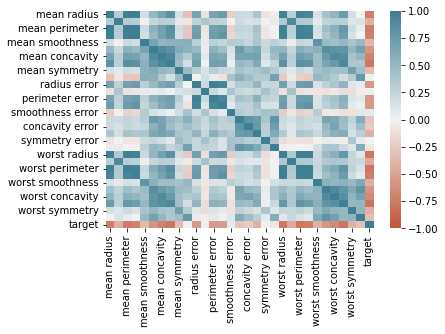

In [51]:
import seaborn as sns

sns.heatmap(
    data_frame.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [53]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
calculate_classification_metrics(lr, X_train, X_test, y_train, y_test)

,accuracy train,accuracy test,precision train,precision test,recall train,recall test,F1 train
0,0.957746,0.965035,0.970803,0.975904,0.963768,0.964286,0.97006


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(X_train)).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-3.000208e-15,-3.383835e-15,-3.429703e-16,-4.357495e-16,1.057057e-15,-3.062756e-15,-5.921189e-16,9.611508e-16,1.082077e-15,5.349920e-15,...,-6.718674e-16,5.311349e-15,-2.007784e-15,-9.413440e-16,-1.330183e-15,-6.223504e-16,-2.918896e-17,5.003822e-17,-6.087984e-16,-2.050525e-15
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-2.036734e+00,-2.252147e+00,-1.988510e+00,-1.438699e+00,-3.000885e+00,-1.601268e+00,-1.089926e+00,-1.252068e+00,-2.695743e+00,-1.820243e+00,...,-1.742076e+00,-2.219687e+00,-1.708664e+00,-1.213335e+00,-2.597319e+00,-1.428076e+00,-1.284342e+00,-1.736794e+00,-2.123099e+00,-1.578500e+00
25%,-6.711802e-01,-7.397898e-01,-6.722385e-01,-6.420478e-01,-7.169573e-01,-7.385235e-01,-7.284332e-01,-7.129367e-01,-6.650363e-01,-6.616273e-01,...,-6.508010e-01,-7.595683e-01,-6.658005e-01,-6.184929e-01,-7.621467e-01,-6.821102e-01,-7.739223e-01,-7.606744e-01,-6.611219e-01,-6.643890e-01
50%,-2.192786e-01,-6.802748e-02,-2.262828e-01,-2.965349e-01,-3.532315e-02,-1.749268e-01,-3.520192e-01,-4.022686e-01,-7.524543e-02,-1.893385e-01,...,-2.660222e-01,-5.572876e-02,-2.801492e-01,-3.336587e-01,-3.454524e-02,-2.421374e-01,-2.043021e-01,-2.257881e-01,-1.286561e-01,-2.150897e-01
75%,4.346751e-01,6.245416e-01,4.796565e-01,2.971399e-01,6.612073e-01,4.942793e-01,4.746058e-01,5.032198e-01,5.387099e-01,4.759360e-01,...,4.511626e-01,7.292285e-01,4.929962e-01,3.061712e-01,6.068929e-01,4.713277e-01,5.385866e-01,6.854056e-01,4.695164e-01,4.372243e-01
max,4.083925e+00,3.419192e+00,4.079591e+00,5.346362e+00,4.585612e+00,4.563597e+00,4.216986e+00,3.965496e+00,4.392488e+00,4.843730e+00,...,4.266885e+00,3.928872e+00,4.457766e+00,6.115888e+00,3.845996e+00,5.127534e+00,4.741551e+00,2.745623e+00,6.006920e+00,6.719523e+00


In [55]:
scaled_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression()),
])
scaled_model.fit(X_train, y_train)
calculate_classification_metrics(lr, X_train, X_test, y_train, y_test)

,accuracy train,accuracy test,precision train,precision test,recall train,recall test,F1 train
0,0.957746,0.965035,0.970803,0.975904,0.963768,0.964286,0.97006


### Sieć neuronowa

## Drzewa decyzyjne

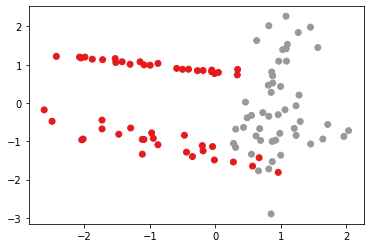

In [58]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Set1')

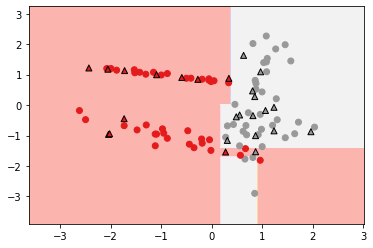

In [59]:
from sklearn.tree import DecisionTreeClassifier

tc = DecisionTreeClassifier()
tc.fit(X_train, y_train)

[Text(148.8, 195.696, 'X <= 0.164\ngini = 0.499\nsamples = 75\nvalue = [39, 36]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(186.0, 152.208, 'Y <= -1.396\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(111.60000000000001, 108.72, 'Y <= -1.685\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(74.4, 65.232, 'X <= 0.909\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(260.40000000000003, 108.72, 'X <= 0.385\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(223.20000000000002, 65.232, 'Y <= 0.026\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(260.40000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 31\nv

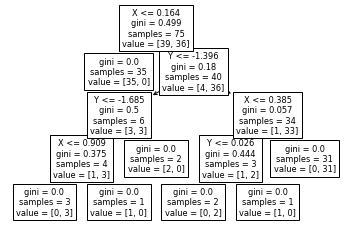

In [63]:
from sklearn.tree import plot_tree
plot_tree(tc, feature_names=['X', 'Y'])

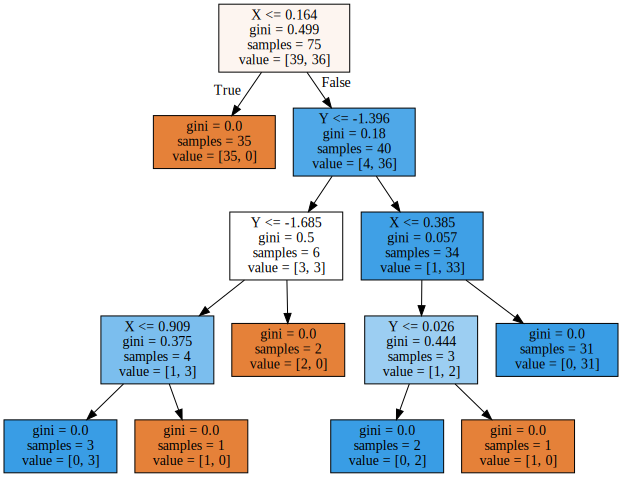

In [97]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(tc, out_file=None, 
                      feature_names=['X', 'Y'],  
                      filled=True)  
graphviz.Source(dot_data) 

In [199]:
print(calculate_classification_metrics(tc, X_train, X_test, y_train, y_test))
plot_class_regions_for_classifier(tc, X_train, y_train, X_test, y_test)

     accuracy train  accuracy test  precision train  precision test  \
NaN        0.664948       0.628866          0.92973        0.965517   

     recall train  recall test  F1 train  
NaN      0.670565     0.622222  0.756757  


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [76]:
tc1 = DecisionTreeClassifier(min_samples_leaf=10)
tc2 = DecisionTreeClassifier(max_depth=3)
tc3 = DecisionTreeClassifier(max_leaf_nodes=4)

for x in [tc1, tc2, tc3]:
    x.fit(X_train, y_train)
list(map(lambda x: x.fit(X_train,y_train), [tc1, tc2, tc3]))
[x.fit(X_train, y_train) for x in [tc1, tc2, tc3]]

[DecisionTreeClassifier(min_samples_leaf=10),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_leaf_nodes=4)]

   accuracy train  accuracy test  precision train  precision test  \
0        0.946667           0.92              1.0             1.0   

   recall train  recall test  F1 train  
0           0.9        0.875  0.933333  


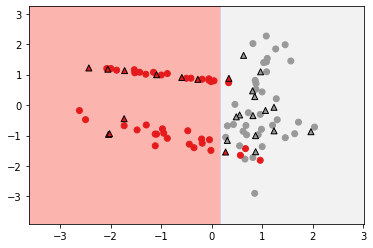

In [80]:
print(calculate_classification_metrics(tc1, X_train, X_test, y_train, y_test))
plot_class_regions_for_classifier(tc1, X_train, y_train, X_test, y_test)

   accuracy train  accuracy test  precision train  precision test  \
0        0.973333           0.92              1.0        0.928571   

   recall train  recall test  F1 train  
0      0.947368     0.928571  0.928571  


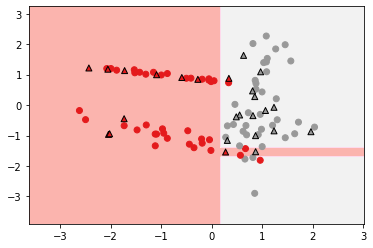

In [78]:
print(calculate_classification_metrics(tc2, X_train, X_test, y_train, y_test))
plot_class_regions_for_classifier(tc2, X_train, y_train, X_test, y_test)

   accuracy train  accuracy test  precision train  precision test  \
0        0.973333           0.92              1.0        0.928571   

   recall train  recall test  F1 train  
0      0.947368     0.928571  0.928571  


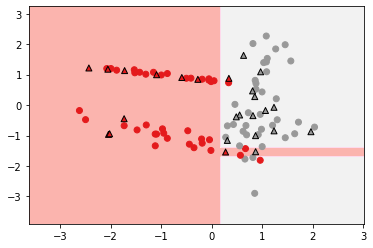

In [79]:
print(calculate_classification_metrics(tc3, X_train, X_test, y_train, y_test))
plot_class_regions_for_classifier(tc3, X_train, y_train, X_test, y_test)

### Drzewo decyzyjne na realnych danych

In [99]:
data=pd.read_csv('/home/johny/Documents/Podyplomowe/audit_data/trial.csv')

In [104]:
data.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

<AxesSubplot:ylabel='Frequency'>

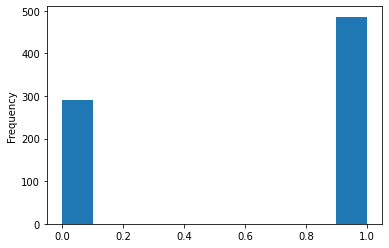

In [118]:
data.Risk.plot.hist()

In [100]:
data.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [115]:
pd.crosstab(data.Risk, data.Sector_score)

Sector_score,1.85,1.99,2.34,2.36,2.37,2.72,3.41,3.89,15.56,17.68,21.61,55.57,59.85
Risk,,,,,,,,,,,,,
0,14,15,4,0,20,12,10,34,0,0,36,116,29
1,81,32,1,1,54,70,66,80,3,1,5,84,8


In [239]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Risk', axis=1), data.Risk)

In [155]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['LOCATION_ID'])])

      accuracy train  accuracy test  precision train  precision test  \
Tree        0.664948       0.628866          0.92973        0.965517   

      recall train  recall test  F1 train  
Tree      0.670565     0.622222  0.756757  


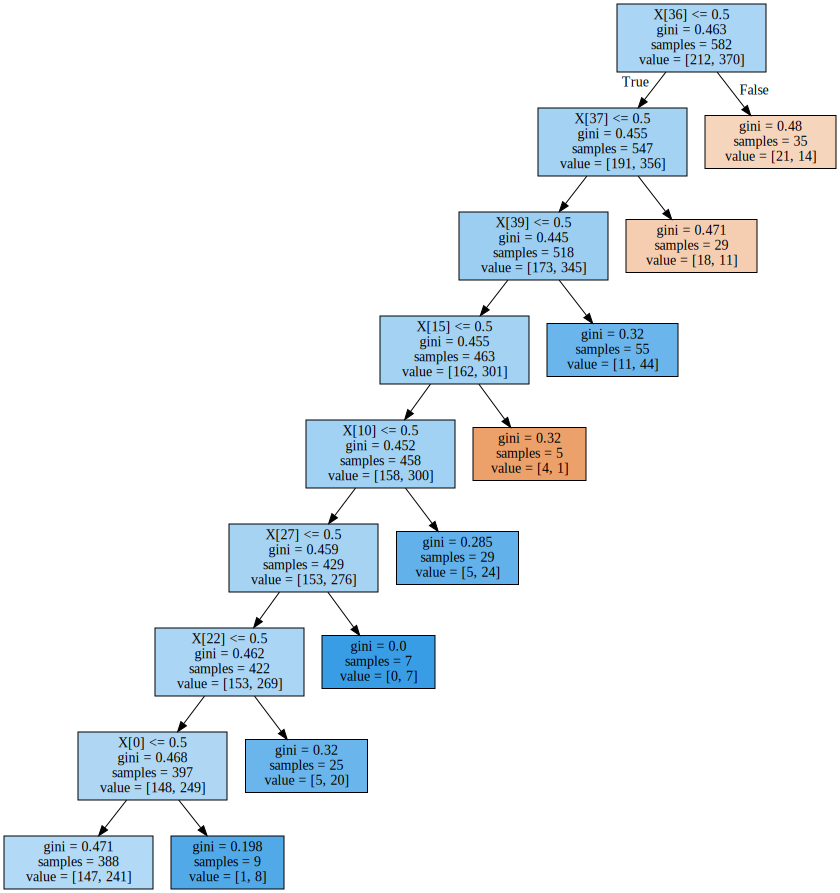

In [182]:
tc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(max_depth=8))])
tc.fit(X_train, y_train)
tree_results = calculate_classification_metrics(tc, X_train, X_test, y_train, y_test, 'Tree')
print(tree_results)
dot_data = export_graphviz(tc['classifier'], out_file=None,
                      filled=True)  
graphviz.Source(dot_data)

## Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
rf_results = calculate_classification_metrics(rf, X_train, X_test, y_train, y_test, 'Random Forest')
print(rf_results)

               accuracy train  accuracy test  precision train  precision test  \
Random Forest        0.680412       0.634021         0.897297        0.913793   

               recall train  recall test  F1 train  
Random Forest      0.691667     0.634731  0.749117  


## Boosting

In [177]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', AdaBoostClassifier())])
ada_boost.fit(X_train, y_train)
adaboost_result = calculate_classification_metrics(ada_boost, X_train, X_test, y_train, y_test, 'ADAboost')
print(adaboost_result)

          accuracy train  accuracy test  precision train  precision test  \
ADAboost        0.680412       0.613402         0.916216        0.913793   

          recall train  recall test  F1 train  
ADAboost      0.686235     0.619883  0.738676  


In [184]:
from xgboost import XGBClassifier
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])
xgb.fit(X_train, y_train)
xgb_results = calculate_classification_metrics(xgb, X_train, X_test, y_train, y_test, 'XGBoost')
print(xgb_results)

/home/johny/.virtualenvs/q/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
         accuracy train  accuracy test  precision train  precision test  \
XGBoost        0.666667       0.623711         0.924324        0.948276   

         recall train  recall test  F1 train  
XGBoost      0.673228     0.621469  0.750853  


# Wybór modeli

In [191]:
classifiers = [tc, rf, ada_boost, xgb]
pd.concat([tree_results, rf_results, adaboost_result, xgb_results])

,accuracy train,accuracy test,precision train,precision test,recall train,recall test,F1 train
Tree,0.664948,0.628866,0.929730,0.965517,0.670565,0.622222,0.756757
Random Forest,0.680412,0.634021,0.897297,0.913793,0.691667,0.634731,0.749117
ADAboost,0.680412,0.613402,0.916216,0.913793,0.686235,0.619883,0.738676
XGBoost,0.666667,0.623711,0.924324,0.948276,0.673228,0.621469,0.750853


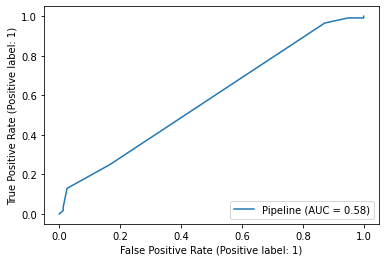

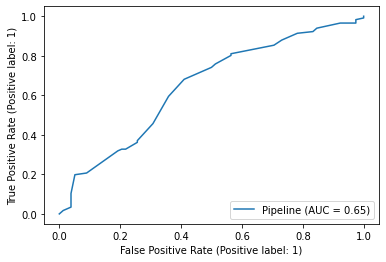

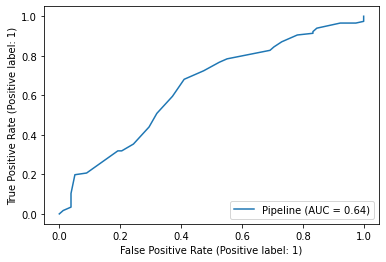

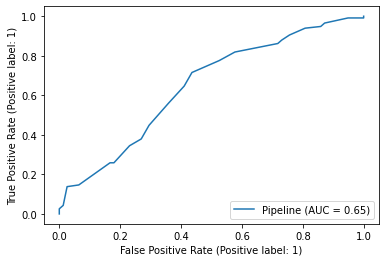

In [192]:
from sklearn.metrics import plot_roc_curve
for clf in classifiers:
    plot_roc_curve(clf, X_test, y_test) 

Text(0.5, 0.98, 'ROC curve comparison')

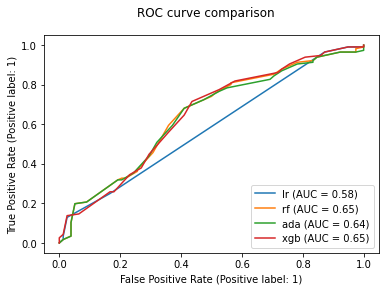

In [210]:
roc1 = plot_roc_curve(tc, X_test, y_test, name='lr')
roc2 = plot_roc_curve(rf, X_test, y_test, ax=roc1.ax_, name='rf')
roc3 = plot_roc_curve(ada_boost, X_test, y_test, ax=roc1.ax_, name='ada')
roc4 = plot_roc_curve(xgb, X_test, y_test, ax=roc1.ax_, name='xgb')
roc1.figure_.suptitle("ROC curve comparison")

# Wyjaśnialność modelu

In [194]:
import dalex as dx

In [241]:
exp = dx.Explainer(clf, data.drop('Risk', axis=1), data.Risk)

Preparation of a new explainer is initiated

  -> data              : 776 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 776 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f7c58744b80> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.271, mean = 0.638, max = 0.882
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.882, mean = -0.0122, max = 0.729
  -> model_info        : package sklearn

A new explainer has been created!


In [242]:
exp.model_performance(model_type='classification').plot(geom='roc')

# AutoAI